In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import json

mpl.rcParams['figure.dpi'] = 300

### Reading .json

In [2]:
f = open('strings_data_231129.json')  
data = json.load(f)
f.close()

In [4]:
print([d["username"] for d in data["users"]])

['testa', 'karine.van.doninck@ulb.be', 'tst', 'tsta', 'testaa', 'odt', 'Tristan_test', 'thomasl', 'Tedttt', 'RolandF', 'avas', 'psimion1', 'Martin VASTRADE', 'Boris', 'marc', 'DMR', 'rohan arora', 'MF', 'testa2', 'LJS', 'Robert', 'Jéson', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot', '007', 'DanJ', 'Addie', 'AntoineTest', 'ktest', 'ktest2']


In [5]:
skip_user = ["testa", "tst", "tsta", "testaa", "Tedttt", "testa2", "AntoineTest", "ktest", "ktest2"]

In [6]:
data

{'users': [{'username': 'testa',
   'images': [{'filename': 'Image_10.glb', 'viewed': True, 'answer': 0},
    {'filename': 'Image_11.glb', 'viewed': True, 'answer': 13},
    {'filename': 'Image_12.glb', 'viewed': True, 'answer': 0},
    {'filename': 'Image_15.glb', 'viewed': True, 'answer': 14},
    {'filename': 'Image_16.glb', 'viewed': True, 'answer': 14},
    {'filename': 'Image_17.glb', 'viewed': True, 'answer': 14},
    {'filename': 'Image_18.glb', 'viewed': True, 'answer': 13},
    {'filename': 'Image_19.glb', 'viewed': True, 'answer': 16},
    {'filename': 'Image_2.glb', 'viewed': True, 'answer': 12},
    {'filename': 'Image_3.glb', 'viewed': True, 'answer': 10},
    {'filename': 'Image_5.glb', 'viewed': True, 'answer': 11},
    {'filename': 'Image_6.glb', 'viewed': True, 'answer': 10},
    {'filename': 'Image_8.glb', 'viewed': True, 'answer': 21},
    {'filename': 'Image_9.glb', 'viewed': True, 'answer': 10},
    {'filename': 'image_1.glb', 'viewed': True, 'answer': 10},
    {'

In [7]:
colormap = plt.cm.Accent.colors  # Qualitative colormap
colormap += plt.cm.Dark2.colors
all_users = []

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        for img in user_data["images"] :
            if img["viewed"] :
                not_counted = False
                all_users.append(user_data["username"])
                break

user_colors = {}
for i, user in enumerate(all_users) :
    user_colors[user] = colormap[i]

In [8]:
is_irradiated = {
    "Image_1.glb".upper():False,
    "Image_2.glb".upper():False,
    "Image_3.glb".upper():False,
    "Image_4.glb".upper():False,
    "Image_5.glb".upper():False,
    "Image_6.glb".upper():False,
    "Image_7.glb".upper():False,
    "Image_8.glb".upper():False,
    "Image_9.glb".upper():False,
    "Image_25.glb".upper():False,
    "Image_26.glb".upper():False,
    "Image_27.glb".upper():False,
    "Image_28.glb".upper():False,
    "Image_29.glb".upper():False,
    "Image_10.glb".upper():True,
    "Image_11.glb".upper():True,
    "Image_12.glb".upper():True,
    "Image_13.glb".upper():True,
    "Image_14.glb".upper():True,
    "Image_15.glb".upper():True,
    "Image_16.glb".upper():True,
    "Image_17.glb".upper():True,
    "Image_18.glb".upper():True,
    "Image_19.glb".upper():True,
    "Image_20.glb".upper():True,
    "Image_21.glb".upper():True,
    "Image_22.glb".upper():True,
    "Image_23.glb".upper():True,
    "Image_24.glb".upper():True,
}

In [9]:
images = {name.upper():[] for name in is_irradiated.keys()}
images_counters = {name.upper():[] for name in is_irradiated.keys()}
images_total_count = {}


for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        name = user_data["username"]
        count = 0
        for img in user_data["images"] :
            if img["viewed"] :
                count += 1
                filename = img["filename"].upper()
                images[filename].append(img["answer"])
                images_counters[filename].append(name)
                if filename not in images_total_count.keys() :
                    images_total_count[filename] = 1
                else :
                    images_total_count[filename] += 1
                
        print(name, count)
        
print("---")
for k, v in images.items() :
    print(k, v)

karine.van.doninck@ulb.be 0
odt 10
Tristan_test 0
thomasl 0
RolandF 0
avas 4
psimion1 2
Martin VASTRADE 6
Boris 14
marc 1
DMR 16
rohan arora 1
MF 16
LJS 3
Robert 0
Jéson 0
Bernard H 23
guillaumebernard 20
Rohan Arora 23
Timothy Jadot 23
007 3
DanJ 0
Addie 0
---
IMAGE_1.GLB [10, 10, 10, 10, 11, 9, 11, 10]
IMAGE_2.GLB [12, 12, 9, 9, 12, 12, 10, 12, 12]
IMAGE_3.GLB [12, 12, 12, 13, 12, 13, 13, 12, 13]
IMAGE_4.GLB []
IMAGE_5.GLB [11, 9, 11, 11, 10, 12]
IMAGE_6.GLB [12, 5, 6, 11, 11, 8, 12]
IMAGE_7.GLB []
IMAGE_8.GLB [16, 22, 7, 16, 22, 23, 17, 22]
IMAGE_9.GLB [12, 1, 12, 10, 10, 12]
IMAGE_25.GLB [11, 11, 12, 9, 11, 11, 12, 12, 11, 11, 12]
IMAGE_26.GLB [12, 11, 11, 12, 11, 11, 14]
IMAGE_27.GLB [12, 12, 12, 9, 10, 12, 12, 12, 10, 12]
IMAGE_28.GLB []
IMAGE_29.GLB []
IMAGE_10.GLB [12, 14, 11, 12]
IMAGE_11.GLB [12, 11, 9, 11, 13, 11, 9, 11, 12]
IMAGE_12.GLB [8, 13, 13, 15, 10, 11]
IMAGE_13.GLB []
IMAGE_14.GLB []
IMAGE_15.GLB [12, 14, 14, 13, 13]
IMAGE_16.GLB [12, 11, 12, 12, 13, 12, 12]
IMAGE_1

[12, 1, 12, 10, 10, 12]
['Boris', 'DMR', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot']
[11, 11, 12, 9, 11, 11, 12, 12, 11, 11, 12]
['avas', 'Martin VASTRADE', 'Boris', 'DMR', 'rohan arora', 'MF', 'LJS', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot']
[12, 11, 11, 12, 11, 11, 14]
['odt', 'Martin VASTRADE', 'MF', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot']
[12, 12, 12, 9, 10, 12, 12, 12, 10, 12]
['odt', 'psimion1', 'Martin VASTRADE', 'DMR', 'MF', 'LJS', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot']


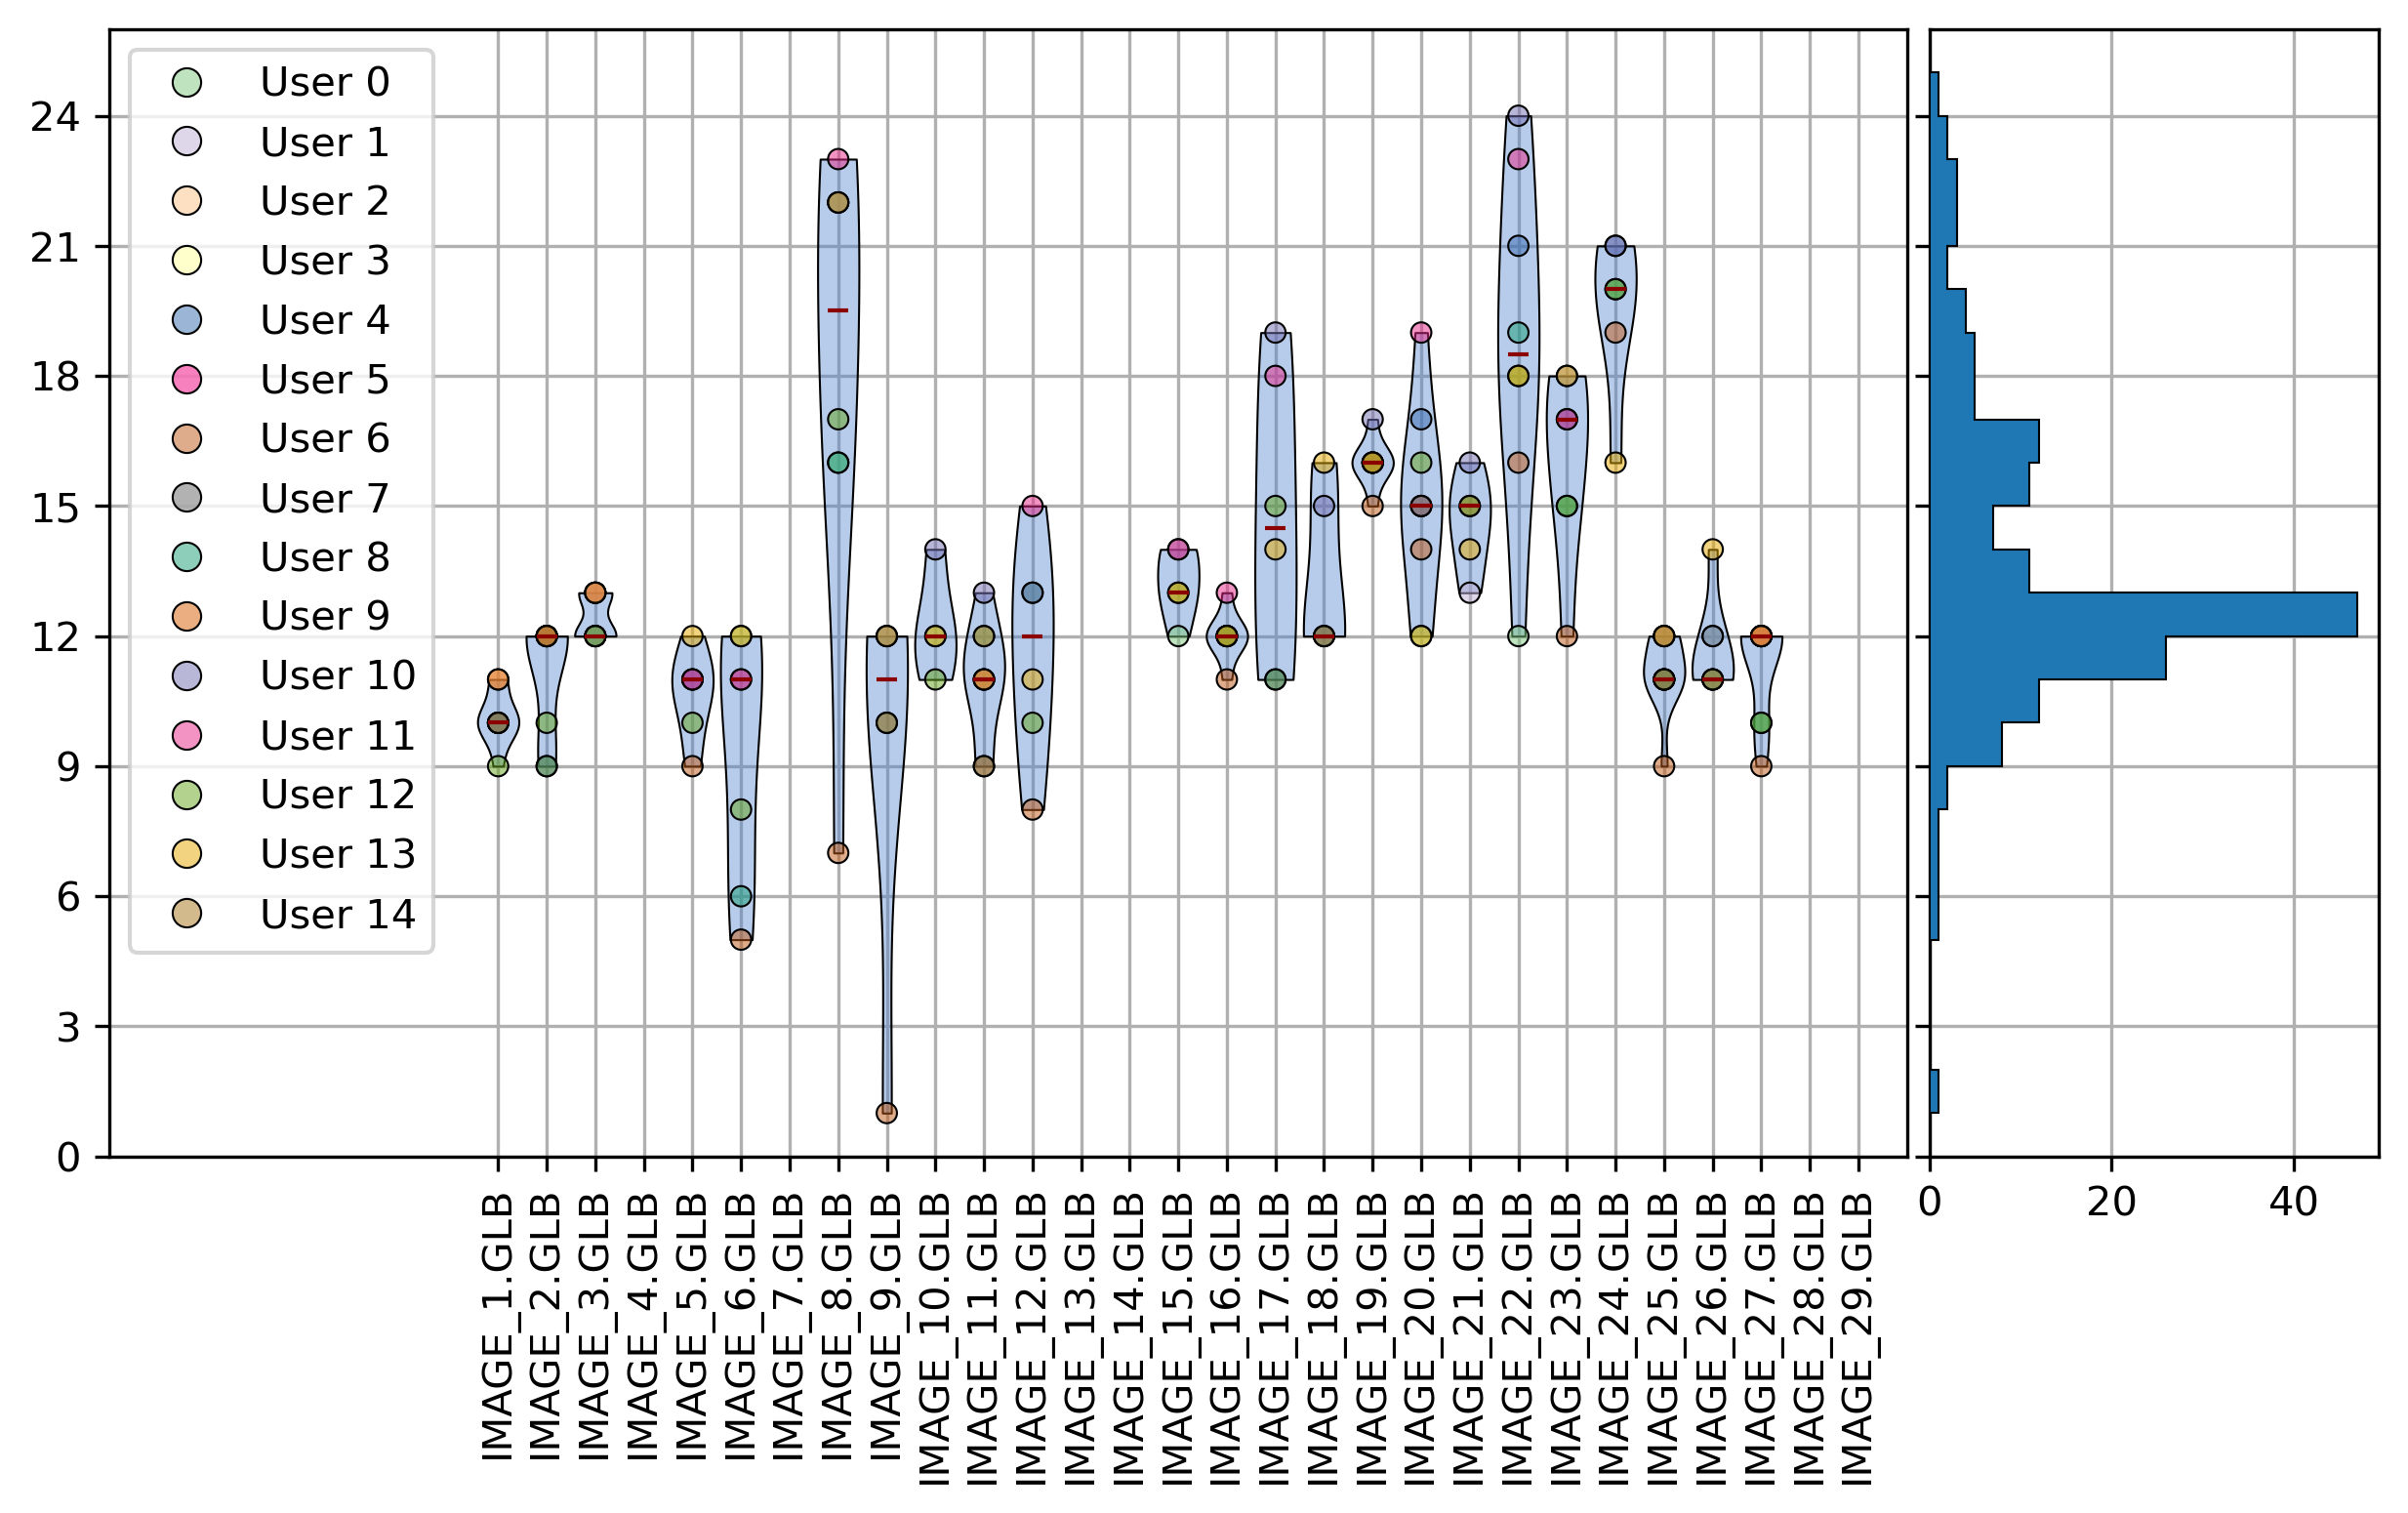

In [40]:
num_images = 30

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10,5), gridspec_kw={"width_ratios":[8,2]})

names = ["Image_{}.glb".format(i).upper() for i in range(1, num_images)]

all_counts = [images[name] for name in names]
all_counters = [images_counters[name] for name in names]
x = np.arange(0, num_images-1, 1)

ax = axs[0]
for i, counts in enumerate(all_counts) :
    
    counters = all_counters[i]
    xp = [x[i] for _ in range(len(counts))]
    c = [list(user_colors[counter])+[0.5] for counter in counters]
    ax.scatter(xp, counts, c=c, ec="k", lw=0.5, s=25, zorder=10)

ax.set_xticks(x)

def format_vps(vps, color) :
    
    for i, b in enumerate(vps["bodies"]) :
        b.set_alpha(None)
        b.set_edgecolor("k")
        b.set_zorder(5)
        b.set_facecolor(color)
        b.set_linewidth(0.5)
    
    
    vps["cmedians"].set_color("darkred")
    vps["cmedians"].set_linewidth(1.0)
    vps["cmedians"].set_alpha(None)
    vps["cmedians"].set_zorder(10)


vp_pos = []
vp_vector = []
for i, vector in enumerate(all_counts) :
    if len(vector) == 0 :
        continue
    else :
        vp_pos.append(i)
        vp_vector.append(vector)

vps = ax.violinplot(dataset=vp_vector, positions=vp_pos, widths=0.85, showmedians=True, showextrema=False)
#ird_col = [0.1,0.6,0.2,0.5]
ctl_col = [0.3,0.5,0.8,0.4]
format_vps(vps,ctl_col)

legend_handles = [
    Line2D([0], [0], marker='o', mfc=list(user_colors[username])+[0.5], mec="k", mew=0.5, ms=7, lw=0, label="User {}".format(i)) for i, username in enumerate(all_users)
]

ax.legend(handles=legend_handles, loc="upper left")
ax.grid(zorder=1)

ax.set_xticklabels(names, rotation=90)

ax.set_yticks([0,3,6,9,12,15,18,21,24])
ax.set_ylim(0,26)
ax.set_xlim(-8,num_images-1)

ax = axs[1]
ax.set_yticks([0,3,6,9,12,15,18,21,24])
ax.set_yticklabels(["" for _ in [0,3,6,9,12,15,18,21,24]])
ax.set_ylim(0,26)

print(all_counts[8])
print(all_counters[8])

print(all_counts[24])
print(all_counters[24])

print(all_counts[25])
print(all_counters[25])

print(all_counts[26])
print(all_counters[26])

all_counts_flattened = [item for sublist in all_counts for item in sublist]

ax.hist(all_counts_flattened, bins=np.arange(0,26,1), orientation="horizontal", ec="k", lw=0.5, histtype="stepfilled", zorder=10)
ax.grid(zorder=1)

fig.subplots_adjust(wspace=0.02)

plt.show()

[10, 10, 10, 10, 11, 9, 11, 10, 12, 12, 9, 9, 12, 12, 10, 12, 12, 12, 12, 12, 13, 12, 13, 13, 12, 13, 11, 9, 11, 11, 10, 12, 12, 5, 6, 11, 11, 8, 12, 16, 22, 7, 16, 22, 23, 17, 22, 12, 1, 12, 10, 10, 12, 12, 14, 11, 12, 12, 11, 9, 11, 13, 11, 9, 11, 12, 8, 13, 13, 15, 10, 11, 12, 14, 14, 13, 13, 12, 11, 12, 12, 13, 12, 12, 11, 11, 19, 18, 15, 14, 12, 15, 12, 12, 16, 16, 15, 16, 17, 16, 16, 16, 12, 17, 14, 15, 15, 15, 19, 16, 12, 13, 15, 16, 15, 14, 12, 21, 16, 19, 24, 23, 18, 18, 17, 12, 15, 18, 17, 15, 18, 21, 19, 20, 21, 20, 16, 11, 11, 12, 9, 11, 11, 12, 12, 11, 11, 12, 12, 11, 11, 12, 11, 11, 14, 12, 12, 12, 9, 10, 12, 12, 12, 10, 12]


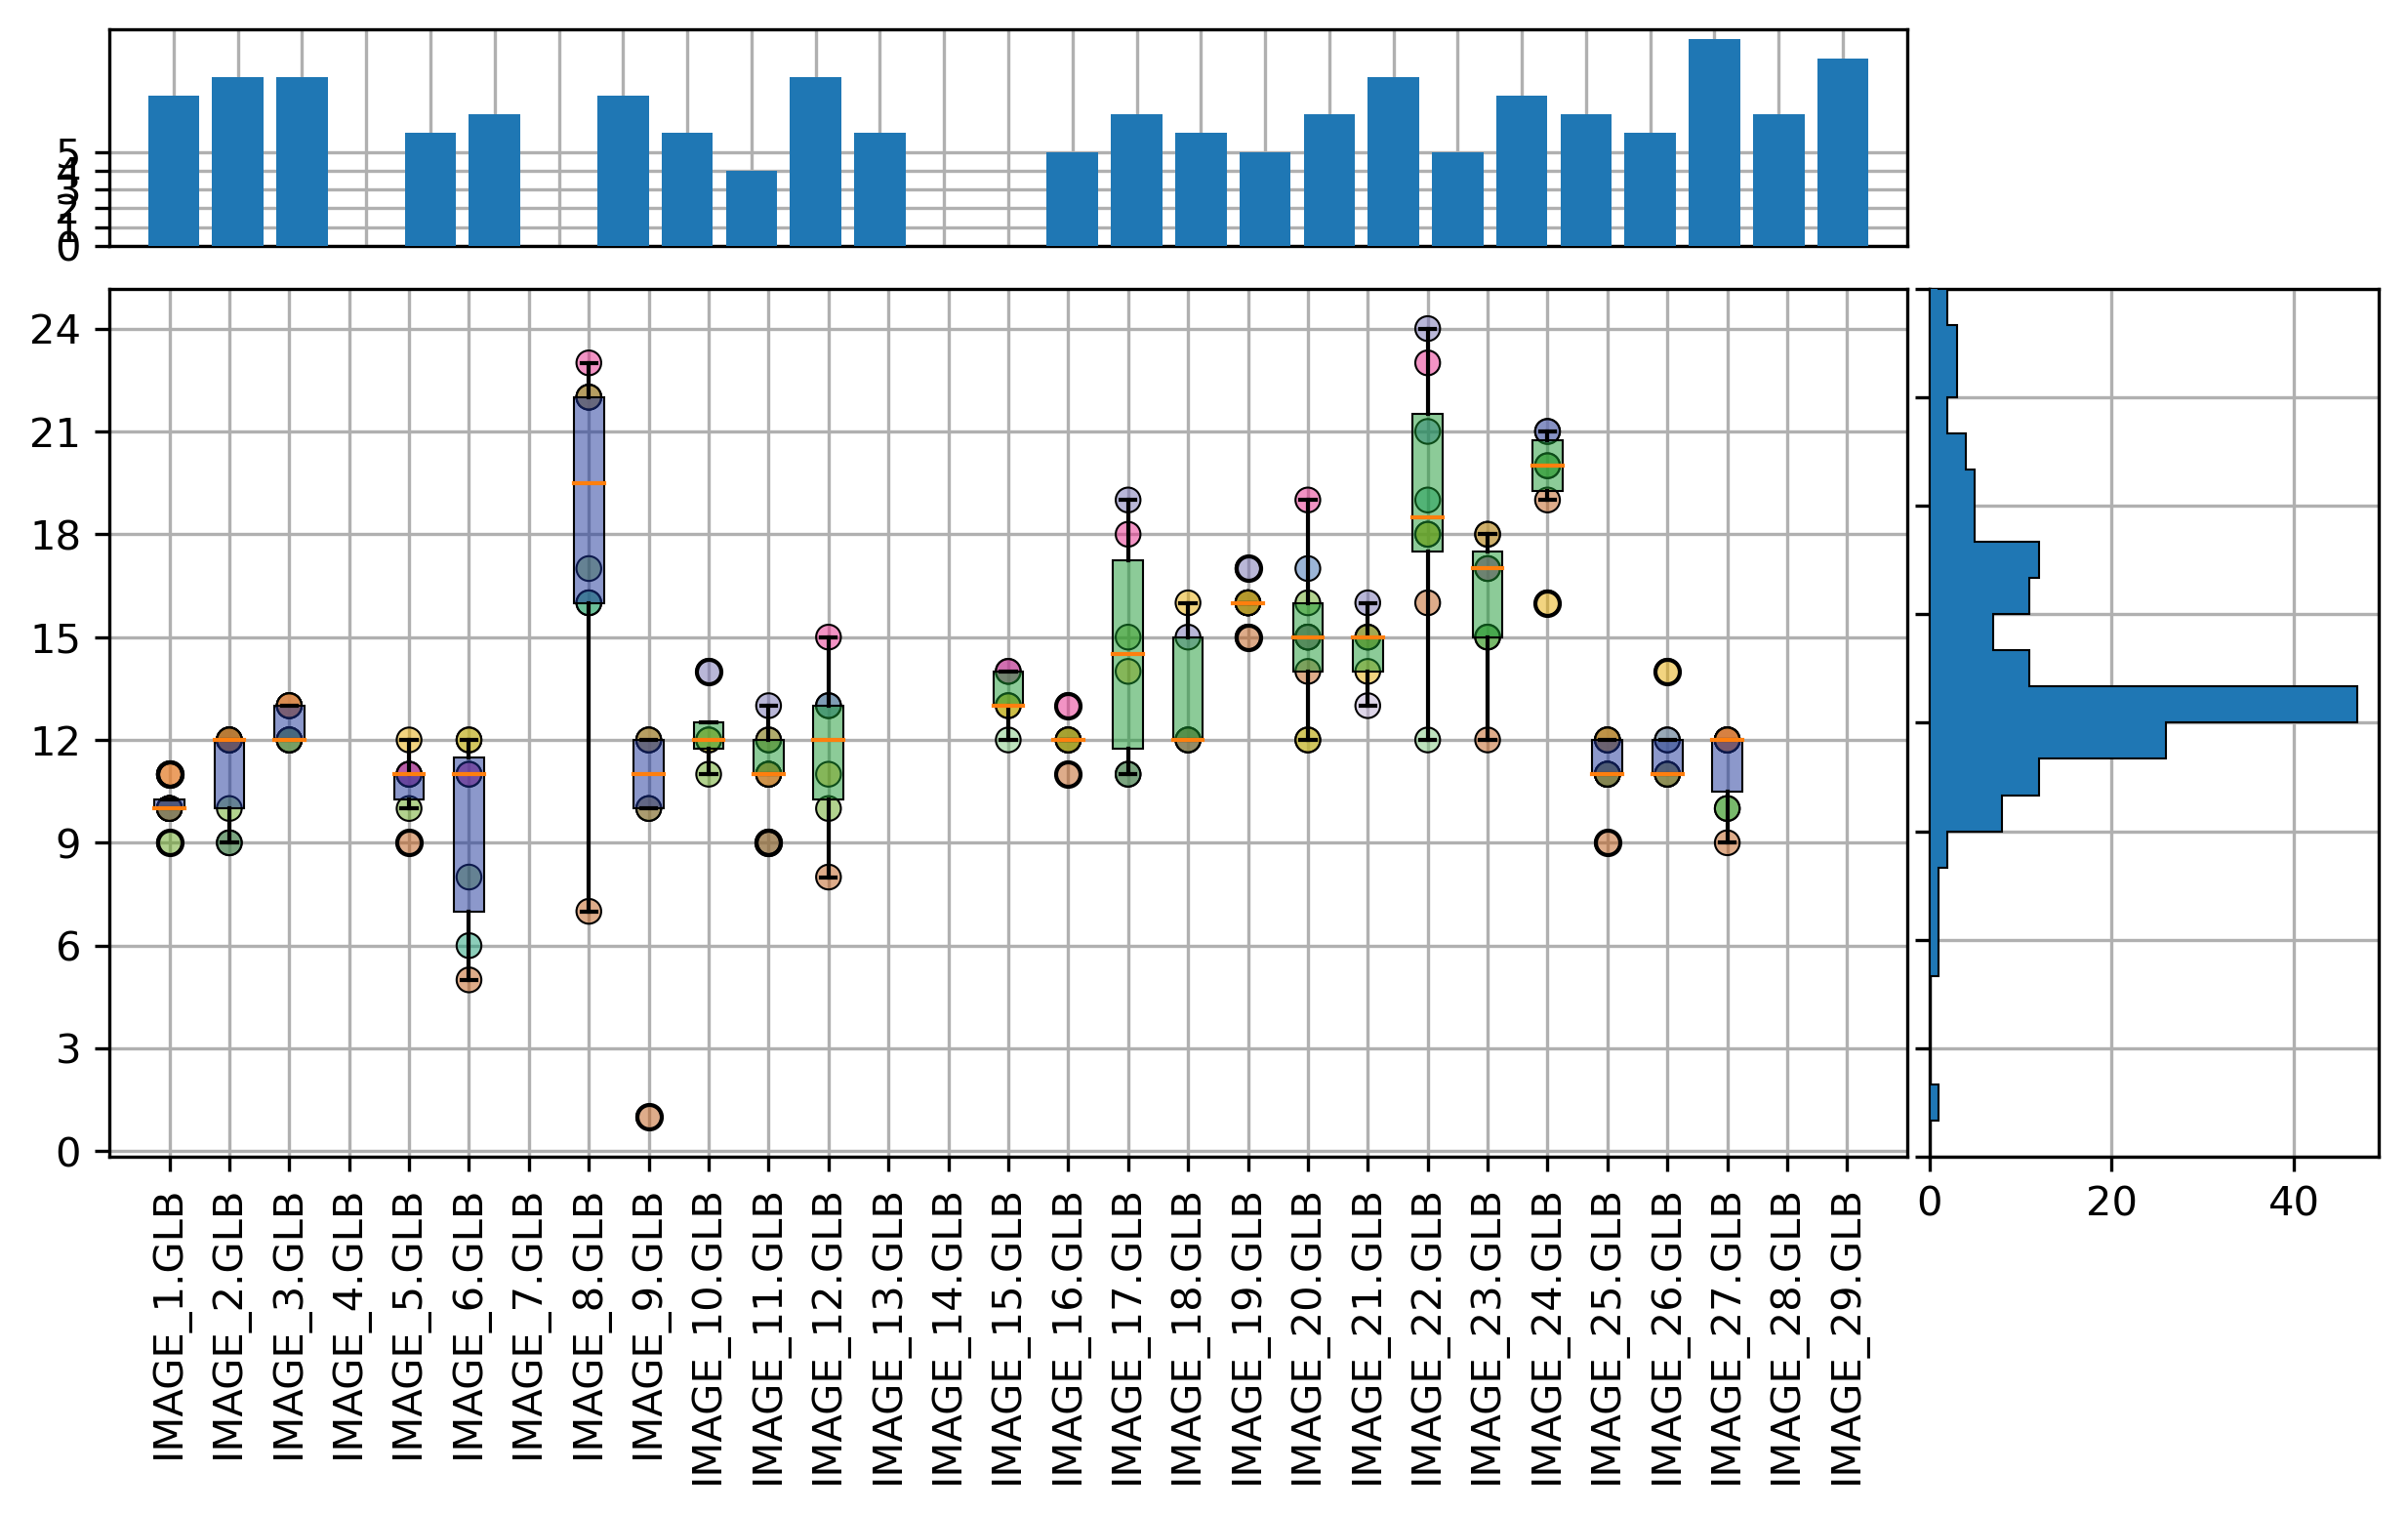

In [44]:
fig, axs = plt.subplots(
    nrows=2, ncols=2, figsize=(10,5),
    gridspec_kw={"width_ratios":[8,2], "height_ratios":[2,8]}
)

names = ["Image_{}.glb".format(i).upper() for i in range(1, 30)]
all_counts = [images[name] for name in names]
all_counters = [images_counters[name] for name in names]
x = np.arange(0, 29, 1)

ax = axs[0,0]
ax.bar(x=x, height=[len(counts) for counts in all_counts], zorder=10)
ax.set_xticks(x)
ax.set_xlim(-1,27)

ax.tick_params(axis="x", length=0)
ax.set_xticklabels(["" for _ in x])
ax.set_yticks(np.arange(0,6,1))
ax.grid(axis="both", zorder=1)

ax = axs[0,1]
ax.set_visible(False)

ax = axs[1,0]

bps = ax.boxplot(all_counts, positions=x, zorder=15, patch_artist=True)

for i, b in enumerate(bps["boxes"]) :
    if is_irradiated[names[i]] :
        b.set_facecolor([0.1,0.6,0.2,0.5])
    else :
        b.set_facecolor([0.1,0.2,0.6,0.5])
        
    b.set_linewidth(0.5)

for i, counts in enumerate(all_counts) :
    
    counters = all_counters[i]
    xp = [x[i] for _ in range(len(counts))]
    c = [list(user_colors[counter])+[0.5] for counter in counters]
    ax.scatter(xp, counts, c=c, ec="k", lw=0.5, s=37, zorder=10)

ax.set_xticks(x)
ax.set_xlim(-1,29)

legend_handles = [
    Line2D([0], [0], marker='o', mfc=list(user_colors[username])+[0.5], mec="k", mew=0.5, ms=7, lw=0, label="User {}".format(i)) for i, username in enumerate(all_users)
]

#ax.legend(handles=legend_handles, loc="upper left")
ax.grid(zorder=1)

ax.set_xticklabels(names, rotation=90)

ax.set_yticks([0,3,6,9,12,15,18,21,24])

ax = axs[1,1]
ax.set_yticks([0,3,6,9,12,15,18,21,24])
ax.set_yticklabels(["" for _ in [0,3,6,9,12,15,18,21,24]])
ax.set_ylim(0,24)

all_counts_flattened = [item for sublist in all_counts for item in sublist]
print(all_counts_flattened)
ax.hist(all_counts_flattened, bins=np.arange(0,26,1), orientation="horizontal", ec="k", lw=0.5, histtype="stepfilled", zorder=10)
ax.grid(zorder=1)

fig.subplots_adjust(hspace=0.08, wspace=0.02)

plt.show()

## Consistency test

['Martin VASTRADE', 'MF', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot'] [11, 11, 12, 11, 11, 12] [11, 11, 12, 11, 11, 14]
['DMR', 'MF', 'Bernard H', 'guillaumebernard', 'Rohan Arora', 'Timothy Jadot'] [9, 9, 12, 12, 10, 12] [9, 10, 12, 12, 10, 12]
Martin VASTRADE 11 11
MF 11 11
Bernard H 12 12
guillaumebernard 11 11
Rohan Arora 11 11
Timothy Jadot 12 14


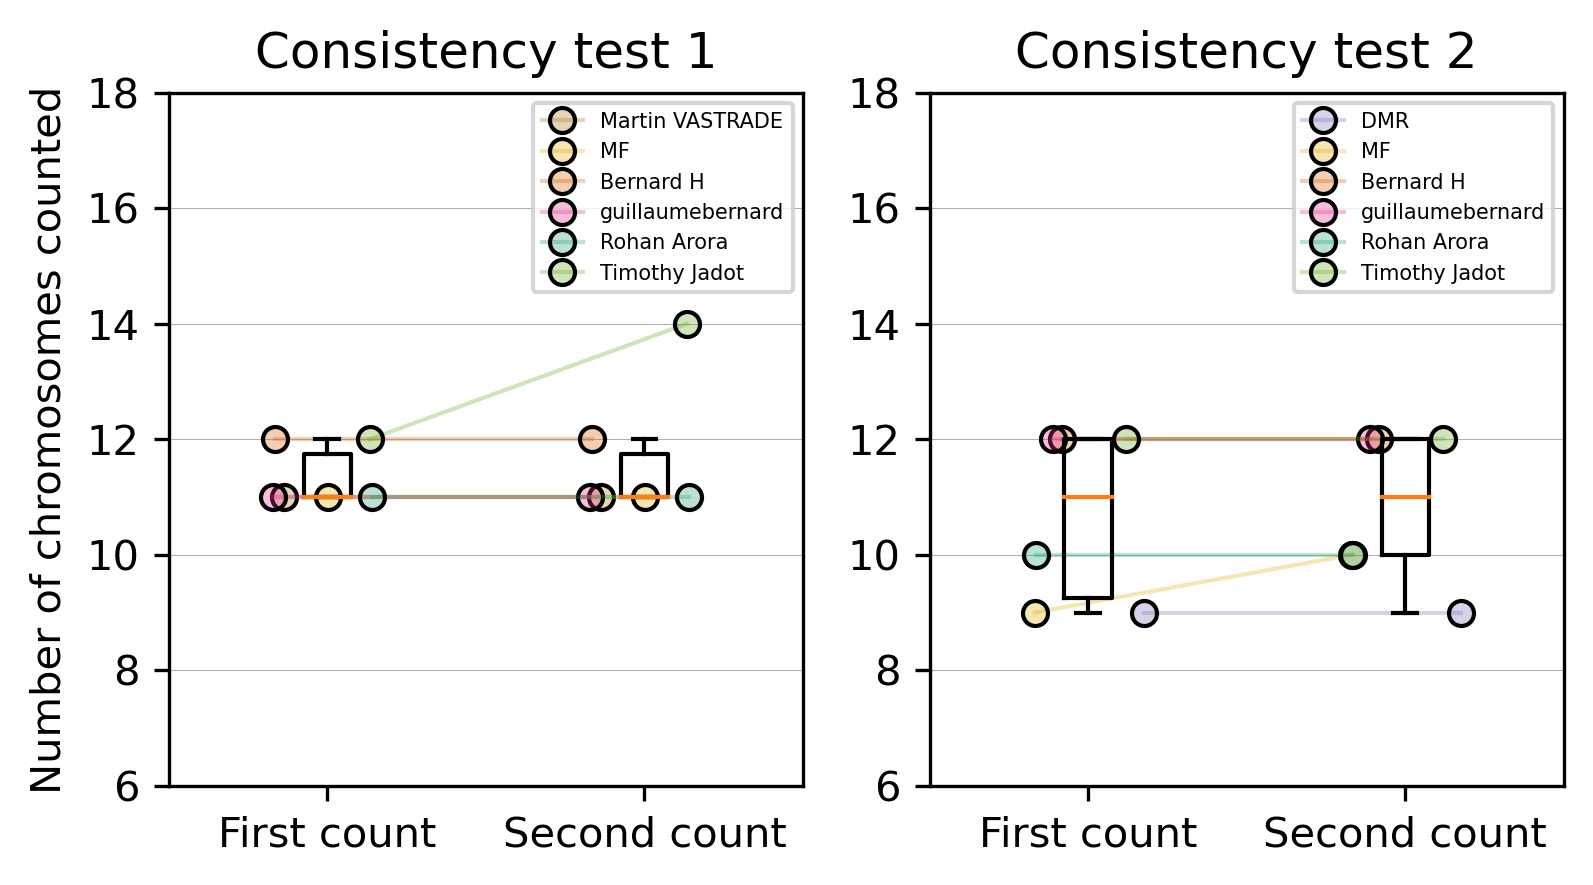

In [103]:
test_1_users = []
test_1_count_1 = []
test_1_count_2 = []

test_2_users = []
test_2_count_1 = []
test_2_count_2 = []

colormap_consistency = plt.cm.Dark2.colors

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        
        viewed_filenames = [img["filename"].upper() for img in user_data["images"] if img["viewed"]]
        #print(user_data["username"], viewed_filenames)
        
        if "IMAGE_25.GLB" in viewed_filenames and "IMAGE_26.GLB" in viewed_filenames :
            
            test_1_users.append(user_data["username"])
            
            for img in user_data["images"] :
                if img["filename"].upper() == "IMAGE_25.GLB" :
                    test_1_count_1.append(img["answer"])
                elif img["filename"].upper() == "IMAGE_26.GLB" :
                    test_1_count_2.append(img["answer"])
                else :
                    continue
        
        if "IMAGE_2.GLB" in viewed_filenames and "IMAGE_27.GLB" in viewed_filenames :
            
            test_2_users.append(user_data["username"])
            
            for img in user_data["images"] :
                if img["filename"].upper() == "IMAGE_2.GLB" :
                    test_2_count_1.append(img["answer"])
                elif img["filename"].upper() == "IMAGE_27.GLB" :
                    test_2_count_2.append(img["answer"])
                else :
                    continue

print(test_1_users, test_1_count_1, test_1_count_2)
print(test_2_users, test_2_count_1, test_2_count_2)

user_colors = {user : list(colormap_consistency[i]) for i, user in enumerate(set(test_1_users+test_2_users))}
#print(user_colors)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6,3))

yticks = np.arange(6,19,2)
xticklabels = ["First count", "Second count"]

ax = axs[0]
ax.boxplot([test_1_count_1, test_1_count_2], positions = [0,1], zorder=5, showfliers=False)
ax.set_ylim(6, 16)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.set_ylabel("Number of chromosomes counted")

for u, c1, c2 in zip(test_1_users, test_1_count_1, test_1_count_2) :
    offset = np.random.uniform(-0.2,0.2)
    print(u, c1, c2)
    ax.plot([0+offset,1+offset], [c1, c2], color=user_colors[u]+[0.3], mec="k", mfc=user_colors[u]+[0.3], marker="o", lw=1, zorder=2, label=u)
ax.grid(axis="y", zorder=1, lw=0.25)

ax.legend(fontsize=5)
ax.set_title("Consistency test 1")

ax = axs[1]
ax.boxplot([test_2_count_1, test_2_count_2], positions = [0,1], zorder=5, showfliers=False)
ax.set_ylim(6, 16)
ax.set_yticks(yticks)
ax.set_xticklabels(xticklabels)
ax.grid(axis="y", zorder=1, lw=0.25)
for u, c1, c2 in zip(test_2_users, test_2_count_1, test_2_count_2) :
    offset = np.random.uniform(-0.2,0.2)
    ax.plot([0+offset,1+offset], [c1, c2], color=user_colors[u]+[0.3], mec="k", mfc=user_colors[u]+[0.3], marker="o", lw=1, zorder=2, label=u)
    
ax.legend(fontsize=5)
ax.set_title("Consistency test 2")
    
plt.show()

# Images to keep and images to remove

In [64]:
images_to_remove = [
    "IMAGE_8.GLB", # Mitosis
    "IMAGE_9.GLB", # too high variance in counts
    "IMAGE_6.GLB", # too high variance in counts
    "IMAGE_4.GLB", # removed file
    "IMAGE_7.GLB", # removed file
    "IMAGE_13.GLB", # removed file
    "IMAGE_14.GLB", # removed file
]


# IMAGE 25 = IMAGE 26
# IMAGE 2 = IMAGE 27
ctl = [
    "IMAGE_1.GLB", "IMAGE_2.GLB", "IMAGE_27.GLB", "IMAGE_3.GLB", "IMAGE_5.GLB", "IMAGE_25.GLB", "IMAGE_26.GLB"
]
ird = [
    "IMAGE_10.GLB", "IMAGE_11.GLB", "IMAGE_12.GLB", "IMAGE_15.GLB", "IMAGE_16.GLB", "IMAGE_17.GLB",
    "IMAGE_18.GLB", "IMAGE_19.GLB", "IMAGE_20.GLB", "IMAGE_21.GLB", "IMAGE_22.GLB", "IMAGE_23.GLB",
    "IMAGE_24.GLB",
]

In [65]:
control_data = []
irradiated_data = []

ctl_cnts = {k:[] for k in ctl}
ird_cnts = {k:[] for k in ird}

ctl_cnts_users = {k:[] for k in ctl}
ird_cnts_users = {k:[] for k in ird}

for user_data in data["users"] :
    if user_data["username"] in skip_user :
        continue
    else :
        #print(user_data)
        for img in user_data["images"] :
            if img["filename"].upper() in images_to_remove :
                continue
            else :
                if img["viewed"] == False or img["answer"] is None :
                    continue
                    
                if img["filename"].upper() in ctl :
                    ctl_cnts[img["filename"].upper()].append(img["answer"])
                    ctl_cnts_users[img["filename"].upper()].append(user_data["username"])
                elif img["filename"].upper() in ird :
                    ird_cnts[img["filename"].upper()].append(img["answer"])
                    ird_cnts_users[img["filename"].upper()].append(user_data["username"])
                    
ctl_num_cnts = {k:len(v) for k, v in ctl_cnts.items()}
ird_num_cnts = {k:len(v) for k, v in ird_cnts.items()}

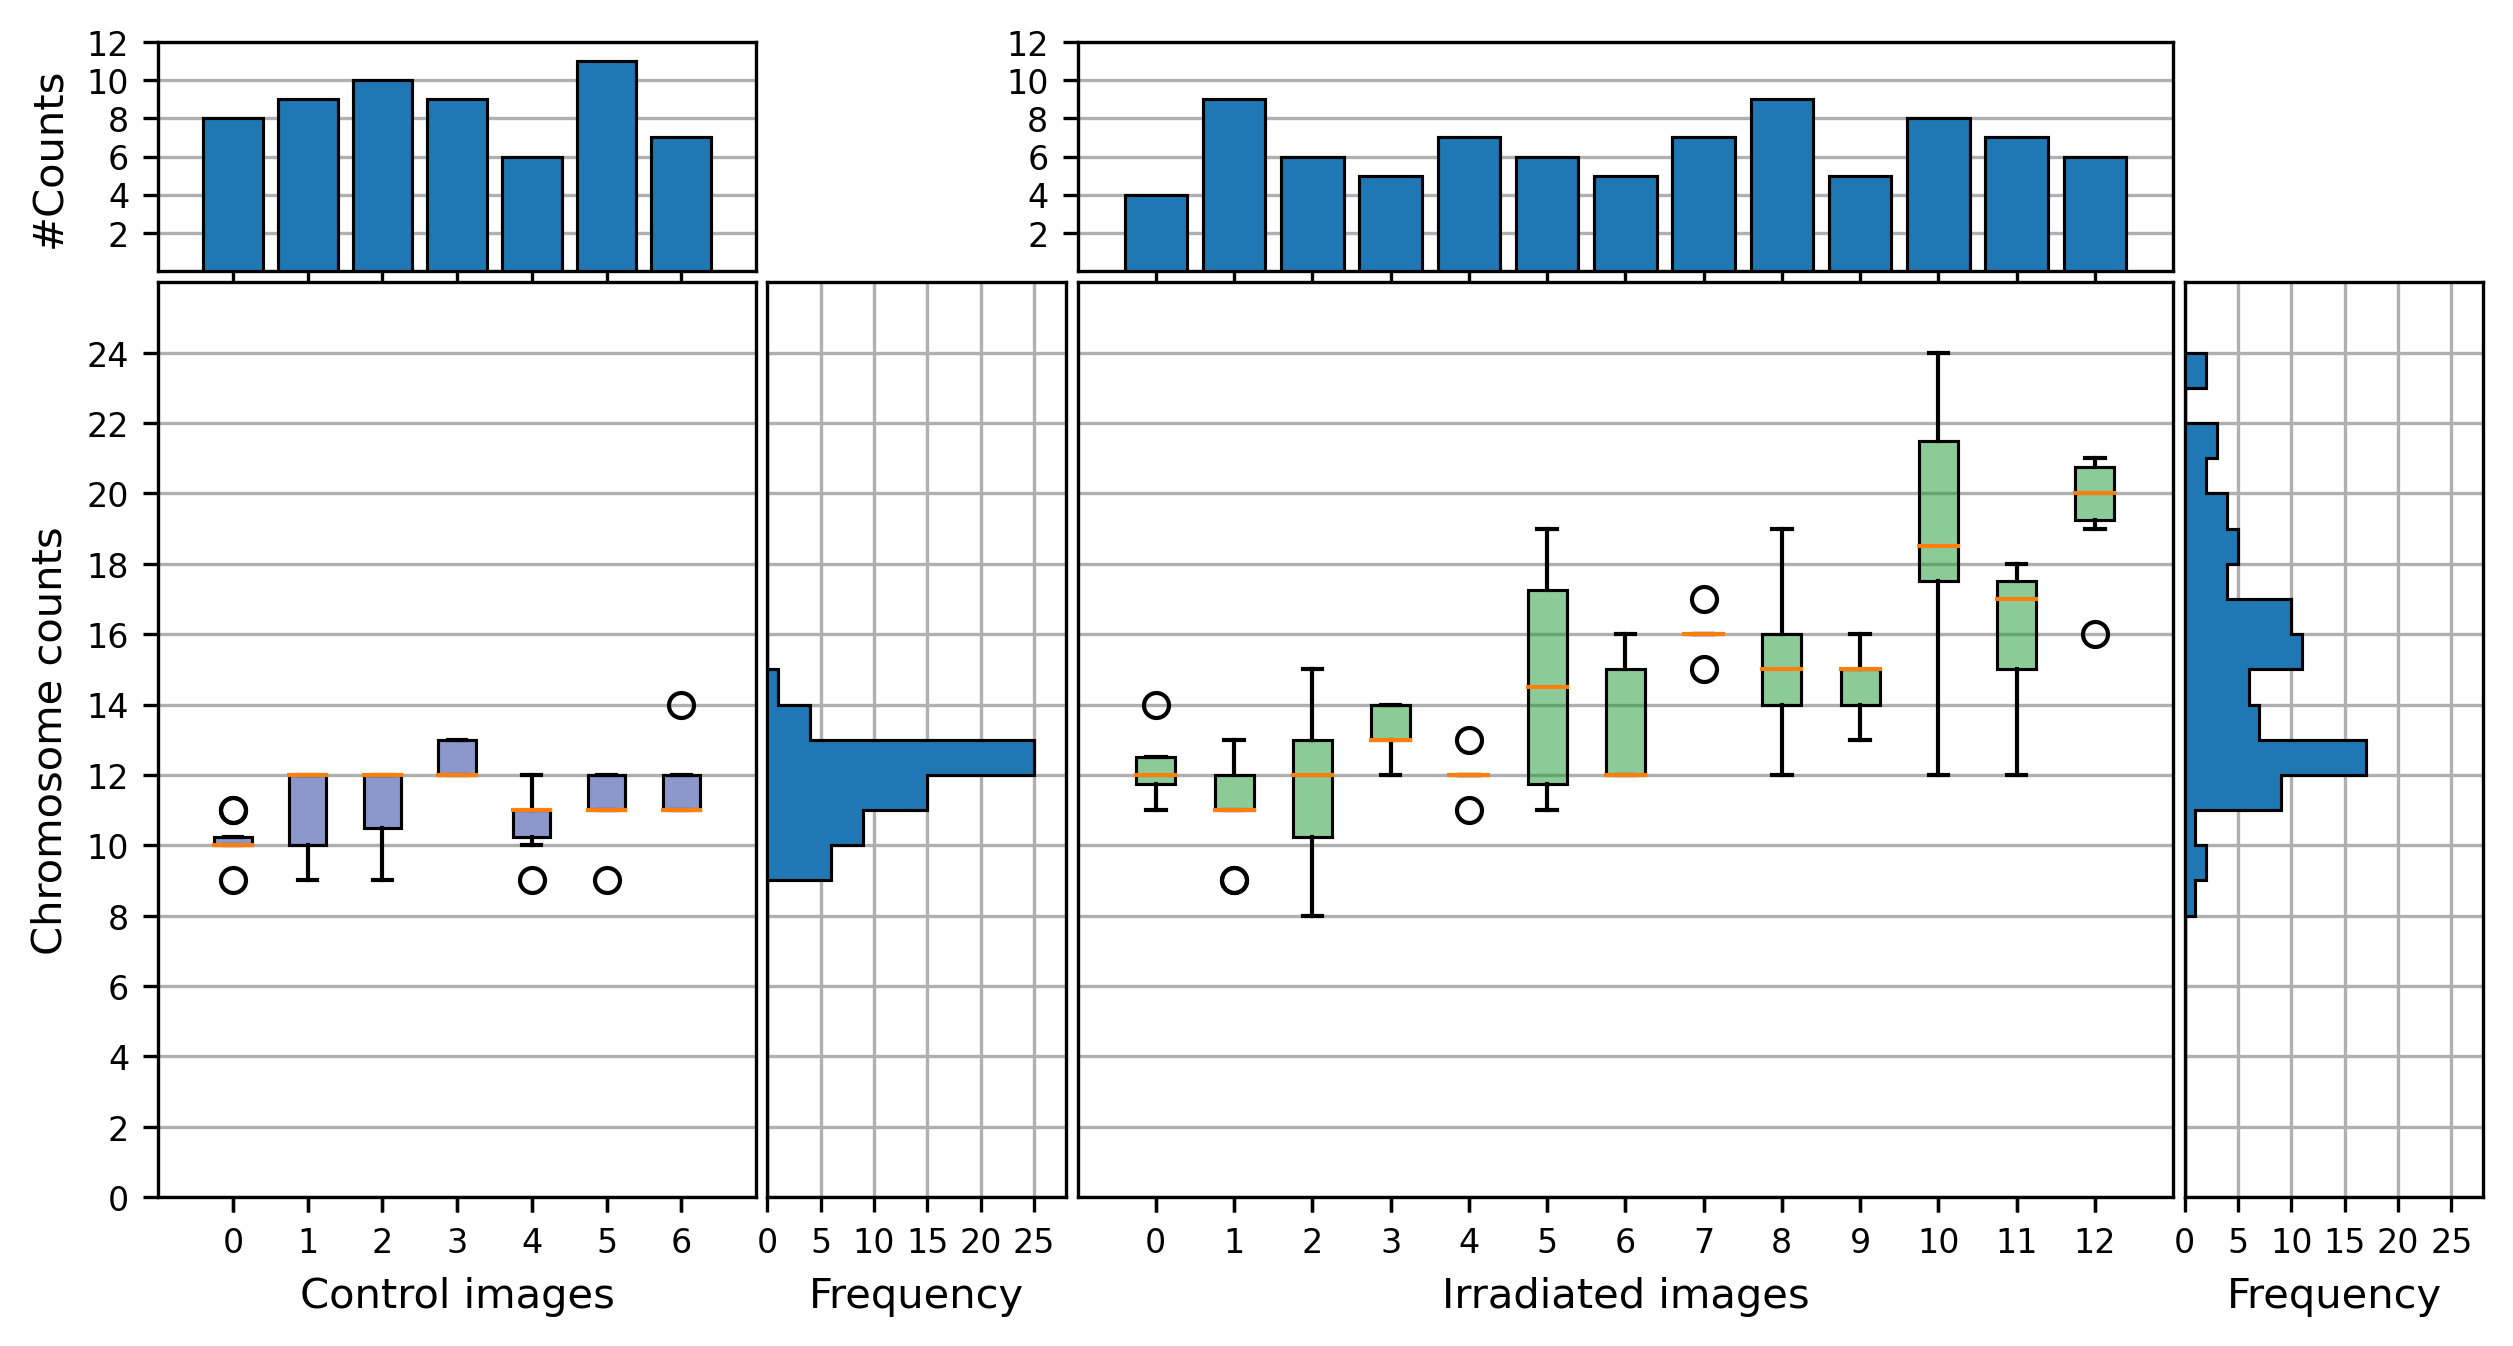

In [75]:
ird_col = [0.1,0.6,0.2,0.5]
ctl_col = [0.1,0.2,0.6,0.5]

def format_bps(bps, color) :
    
    for i, b in enumerate(bps["boxes"]) :
        b.set_facecolor(color)
        b.set_linewidth(0.75)


fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5), gridspec_kw={"width_ratios":[6,3,11,3], "height_ratios":[1,4]})

ax = axs[1,0]
xticks = np.arange(len(ctl_cnts.values()))
ax.set_xticks(xticks)
bps = ax.boxplot(ctl_cnts.values(), positions=xticks, patch_artist=True, zorder=5)
format_bps(bps, ctl_col)

ax = axs[1,1]
xticks = np.arange(0,29,5)
ax.set_xticks(xticks)
flat_counts = [item for sub in ctl_cnts.values() for item in sub]
ax.hist(flat_counts, bins=np.arange(0,25,1), histtype="stepfilled", ec="k", orientation="horizontal", lw=0.75, zorder=5)
ax.set_xlabel("Frequency")

ax = axs[1,2]
xticks = np.arange(len(ird_cnts.values()))
ax.set_xticks(xticks)
bps = ax.boxplot(ird_cnts.values(), positions=xticks, patch_artist=True, zorder=5)
format_bps(bps, ird_col)

ax = axs[1,3]
xticks = np.arange(0,29,5)
ax.set_xticks(xticks)
flat_counts = [item for sub in ird_cnts.values() for item in sub]
ax.hist(flat_counts, bins=np.arange(0,25,1), histtype="stepfilled", ec="k", orientation="horizontal", lw=0.75, zorder=5)
ax.set_xlabel("Frequency")

yticks = np.arange(0,26,2)
for i, ax in enumerate(axs[1,:]) :
    ax.set_ylim(0,26)
    ax.set_yticks(yticks)
    ax.grid(axis="y", zorder=1)
    
    if i > 0 :
        ax.set_yticklabels(["" for _ in yticks])
        ax.tick_params(axis="y", length=0)
        
    if i in [1,3] :
        ax.grid(axis="both", zorder=1)
        
axs[1,0].set_ylabel("Chromosome counts")
axs[1,0].set_xlabel("Control images")
axs[1,2].set_xlabel("Irradiated images")

for ax in axs[:,0] :
    ax.set_xlim(-1,7)
    
for ax in axs[:,2] :
    ax.set_xlim(-1,13)
    
for ax in axs[:,1] :
    ax.set_xlim(0,28)
    
for ax in axs[:,3] :
    ax.set_xlim(0,28)
    
# Add counts
ax = axs[0,0]
xticks = np.arange(len(ctl_num_cnts.values()))
ax.bar(x=xticks, height=ctl_num_cnts.values(), zorder=5, ec="k", lw=0.75)
ax.set_xticks(xticks)
ax.set_xticklabels(["" for _ in xticks])

ax = axs[0,2]
xticks = np.arange(len(ird_num_cnts.values()))
ax.bar(x=xticks, height=ird_num_cnts.values(), zorder=5, ec="k", lw=0.75)
ax.set_xticks(xticks)
ax.set_xticklabels(["" for _ in xticks])

yticks=np.arange(2, 13, 2)
for i, ax in enumerate(axs[0,:]) :
    ax.set_ylim(0,10)
    ax.grid(axis="y", zorder=1)
    ax.set_yticks(yticks)    
    
axs[0,1].set_visible(False)
axs[0,3].set_visible(False)

axs[0,0].set_ylabel("#Counts")

for ax in axs.flatten() :
    ax.tick_params(labelsize=8)

fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()

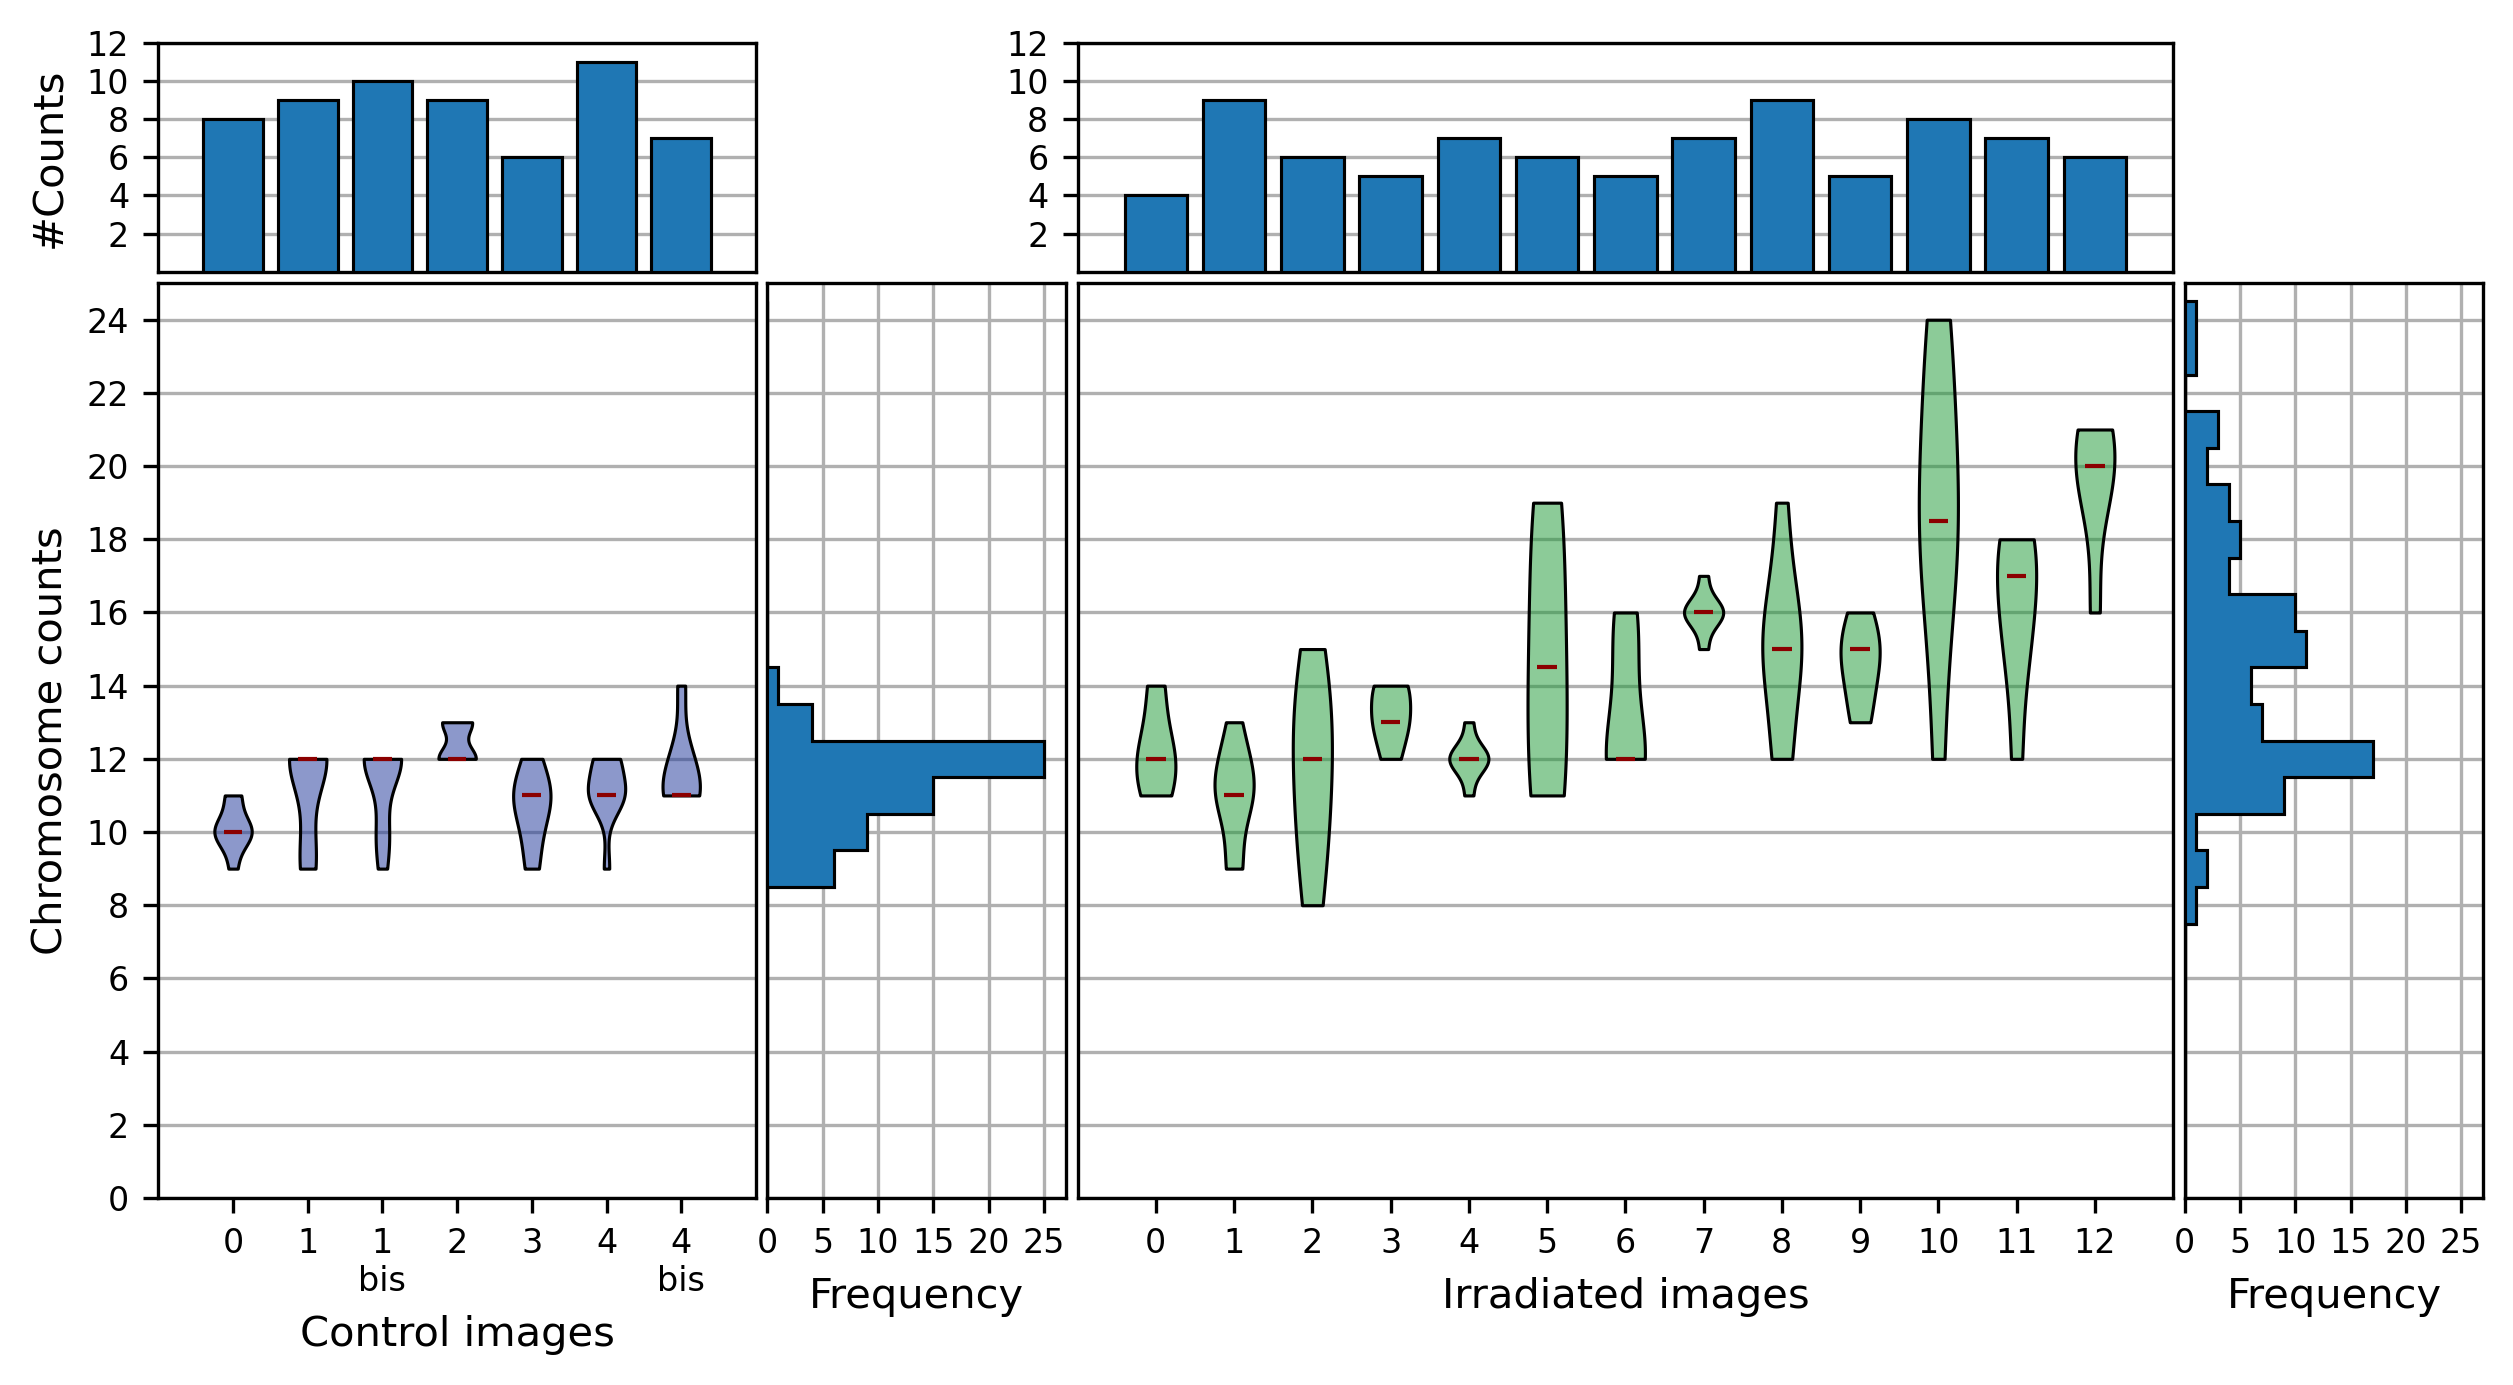

In [90]:
ird_col = [0.1,0.6,0.2,0.5]
ctl_col = [0.1,0.2,0.6,0.5]

def format_vps(vps, color) :
    
    for i, b in enumerate(vps["bodies"]) :
        b.set_alpha(None)
        b.set_edgecolor("k")
        b.set_zorder(5)
        b.set_facecolor(color)
        b.set_linewidth(0.75)
    
    
    vps["cmedians"].set_color("darkred")
    vps["cmedians"].set_linewidth(1.0)
    vps["cmedians"].set_alpha(None)
    vps["cmedians"].set_zorder(10)

fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(10,5), gridspec_kw={"width_ratios":[6,3,11,3], "height_ratios":[1,4]})

ax = axs[1,0]
xticks = np.arange(len(ctl_cnts.values()))
ax.set_xticks(xticks)
bps = ax.violinplot(ctl_cnts.values(), positions=xticks, showmedians=True, showextrema=False) #, patch_artist=True, zorder=5)
format_vps(bps, ctl_col)

xticklabels = ["0", "1", "1\nbis", "2", "3", "4", "4\nbis"]
ax.set_xticklabels(xticklabels)

ax = axs[1,1]
xticks = np.arange(0,27,5)
ax.set_xticks(xticks)
flat_counts = [item for sub in ctl_cnts.values() for item in sub]
ax.hist(flat_counts, bins=np.arange(-0.5,25.5,1), histtype="stepfilled", ec="k", orientation="horizontal", lw=0.75, zorder=5, align="mid")
ax.set_xlabel("Frequency")

ax = axs[1,2]
xticks = np.arange(len(ird_cnts.values()))
ax.set_xticks(xticks)
bps = ax.violinplot(ird_cnts.values(), positions=xticks, showmedians=True, showextrema=False)
format_vps(bps, ird_col)

ax = axs[1,3]
xticks = np.arange(0,27,5)
ax.set_xticks(xticks)
flat_counts = [item for sub in ird_cnts.values() for item in sub]
ax.hist(flat_counts, bins=np.arange(-0.5,25.5,1), histtype="stepfilled", ec="k", orientation="horizontal", lw=0.75, zorder=5, align="mid")
ax.set_xlabel("Frequency")

yticks = np.arange(0,25,2)
for i, ax in enumerate(axs[1,:]) :
    ax.set_ylim(0,25)
    ax.set_yticks(yticks)
    ax.grid(axis="y", zorder=1)
    
    if i > 0 :
        ax.set_yticklabels(["" for _ in yticks])
        ax.tick_params(axis="y", length=0)
        
    if i in [1,3] :
        ax.grid(axis="both", zorder=1)
        
axs[1,0].set_ylabel("Chromosome counts")
axs[1,0].set_xlabel("Control images")
axs[1,2].set_xlabel("Irradiated images")

for ax in axs[:,0] :
    ax.set_xlim(-1,7)
    
for ax in axs[:,2] :
    ax.set_xlim(-1,13)
    
for ax in axs[:,1] :
    ax.set_xlim(0,27)
    
for ax in axs[:,3] :
    ax.set_xlim(0,27)
    
# Add counts
ax = axs[0,0]
xticks = np.arange(len(ctl_num_cnts.values()))
ax.bar(x=xticks, height=ctl_num_cnts.values(), zorder=5, ec="k", lw=0.75)
ax.set_xticks(xticks)
ax.set_xticklabels(["" for _ in xticks])
ax.tick_params(axis="x", length=0)

ax = axs[0,2]
xticks = np.arange(len(ird_num_cnts.values()))
ax.bar(x=xticks, height=ird_num_cnts.values(), zorder=5, ec="k", lw=0.75)
ax.set_xticks(xticks)
ax.set_xticklabels(["" for _ in xticks])
ax.tick_params(axis="x", length=0)

yticks=np.arange(2, 13, 2)
for i, ax in enumerate(axs[0,:]) :
    ax.set_ylim(0,12)
    ax.grid(axis="y", zorder=1)
    ax.set_yticks(yticks)    
    
axs[0,1].set_visible(False)
axs[0,3].set_visible(False)

axs[0,0].set_ylabel("#Counts")

for ax in axs.flatten() :
    ax.tick_params(labelsize=8)

fig.subplots_adjust(wspace=0.02, hspace=0.02)

plt.show()